# Analyse parameters

In [1]:
# data + modelling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [2]:
out_dir = 'output/'

In [3]:
expt1 = pd.read_csv('analysis/EXPERIMENT_1_RESULTS.csv')
expt2 = pd.read_csv('analysis/EXPERIMENT_2_RESULTS.csv')

# add Experiment column
def new_col_of_value(df, colname, value):
    '''Add column representing experiment number'''
    df[colname] = pd.Series(value, index=df.index)
    return df

expt1 = new_col_of_value(expt1, 'Experiment', 1)
expt2 = new_col_of_value(expt2, 'Experiment', 2)

In [4]:
expt1.head()

,Unnamed: 0,id,PID,logk,logs,α,paradigm,reward_mag,AUC,percent_predicted,log_loss,Experiment
0,0,0,1012,-5.438958,-0.571688,3.848033,deferred,low,0.723071,1.00,0.024836,1
1,1,1,1006,-4.498523,-0.160125,0.604191,deferred,low,0.652442,0.90,0.223576,1
2,2,2,1007,-1.727847,-0.285790,0.237990,deferred,low,0.214105,0.84,0.371039,1
3,3,3,1013,-5.761681,-0.772840,2.034707,deferred,low,0.719888,0.94,0.134102,1
4,4,4,1005,-2.517118,-0.098723,0.347406,deferred,low,0.286903,0.86,0.466383,1


In [5]:
expt2.head()

,Unnamed: 0,id,PID,logk,logs,α,paradigm,domain,AUC,percent_predicted,log_loss,Experiment
0,0,0,3017,-5.269164,-0.012190,0.858047,deferred,gain,0.802980,0.92,0.183285,2
1,1,1,3003,-5.166283,-0.067975,2.559252,deferred,gain,0.777461,0.98,0.072352,2
2,2,2,3002,-1.417880,0.056741,0.142922,deferred,gain,0.123750,0.82,0.477998,2
3,3,3,3014,-5.651851,-0.034412,0.217010,deferred,gain,0.849366,0.82,0.390929,2
4,4,4,3029,-4.410692,-0.038290,0.186978,deferred,gain,0.648725,0.76,0.454863,2


## Get summary statistics (of $k$ and $s$)

In [6]:
expt1['k'] = np.exp(expt1['logk'])
expt1['s'] = np.exp(expt1['logs'])

expt2['k'] = np.exp(expt2['logk'])
expt2['s'] = np.exp(expt2['logs'])

In [7]:
def get_stats(group):
    return {'mean': group.mean(), 'std': group.std(), 'N': group.count()}

### Experiment 1

In [8]:
expt1.groupby(['paradigm','reward_mag'])['logk'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm reward_mag                    
deferred high       -4.231  1.138  44.0
         low        -4.082  1.289  43.0
online   high       -3.490  1.385  36.0
         low        -3.445  1.463  34.0

In [9]:
expt1.groupby(['paradigm','reward_mag'])['logs'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm reward_mag                    
deferred high       -0.055  0.679  44.0
         low        -0.159  0.371  43.0
online   high        0.577  0.672  36.0
         low         0.449  0.446  34.0

In [10]:
expt1.groupby(['paradigm','reward_mag'])['AUC'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm reward_mag                    
deferred high        0.587  0.204  44.0
         low         0.574  0.211  43.0
online   high        0.428  0.257  36.0
         low         0.447  0.303  34.0

In [11]:
expt1.groupby(['paradigm','reward_mag'])['k'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm reward_mag                    
deferred high        0.025  0.027  44.0
         low         0.041  0.076  43.0
online   high        0.065  0.084  36.0
         low         0.071  0.085  34.0

In [12]:
expt1.groupby(['paradigm','reward_mag'])['s'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm reward_mag                    
deferred high        1.191  0.892  44.0
         low         0.912  0.335  43.0
online   high        2.287  1.949  36.0
         low         1.728  0.810  34.0

### Experiment 2

In [13]:
expt2.groupby(['paradigm','domain'])['logk'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm domain                    
deferred gain   -4.321  1.595  46.0
         loss   -5.004  0.974  37.0
online   gain   -3.081  0.944  33.0
         loss   -3.976  1.017  44.0

In [14]:
expt2.groupby(['paradigm','domain'])['logs'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm domain                    
deferred gain   -0.145  0.568  46.0
         loss   -0.009  0.697  37.0
online   gain    0.596  0.616  33.0
         loss    0.781  0.847  44.0

In [15]:
expt2.groupby(['paradigm','domain'])['AUC'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm domain                    
deferred gain    0.567  0.248  46.0
         loss    0.714  0.189  37.0
online   gain    0.358  0.225  33.0
         loss    0.549  0.258  44.0

In [16]:
expt2.groupby(['paradigm','domain'])['k'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm domain                    
deferred gain    0.038  0.057  46.0
         loss    0.011  0.016  37.0
online   gain    0.066  0.052  33.0
         loss    0.032  0.041  44.0

In [17]:
expt2.groupby(['paradigm','domain'])['s'].apply(get_stats).unstack().round(decimals=3)

mean    std     N
paradigm domain                    
deferred gain    1.036  0.805  46.0
         loss    1.310  1.312  37.0
online   gain    2.232  1.766  33.0
         loss    3.099  2.837  44.0

## Plot group mean discount functions

In [18]:
def discount_function(delay, k, s):
    ''' This is the MODIFIED Rachlin discount function. This is outlined
    in Vincent & Stewart (2018).
    Vincent, B. T., & Stewart, N. (2018, October 16). The case of muddled
    units in temporal discounting. https://doi.org/10.31234/osf.io/29sgd
    '''
    return 1 / (1.0+(k*delay)**s)

In [19]:
delays = np.linspace(0, 101, 1000)

0.016877969615263187 0.8533879917732056
0.014544026879388165 0.946556245395745
0.031906748187602536 1.5674282278450093
0.030496312522032987 1.7810673255632377


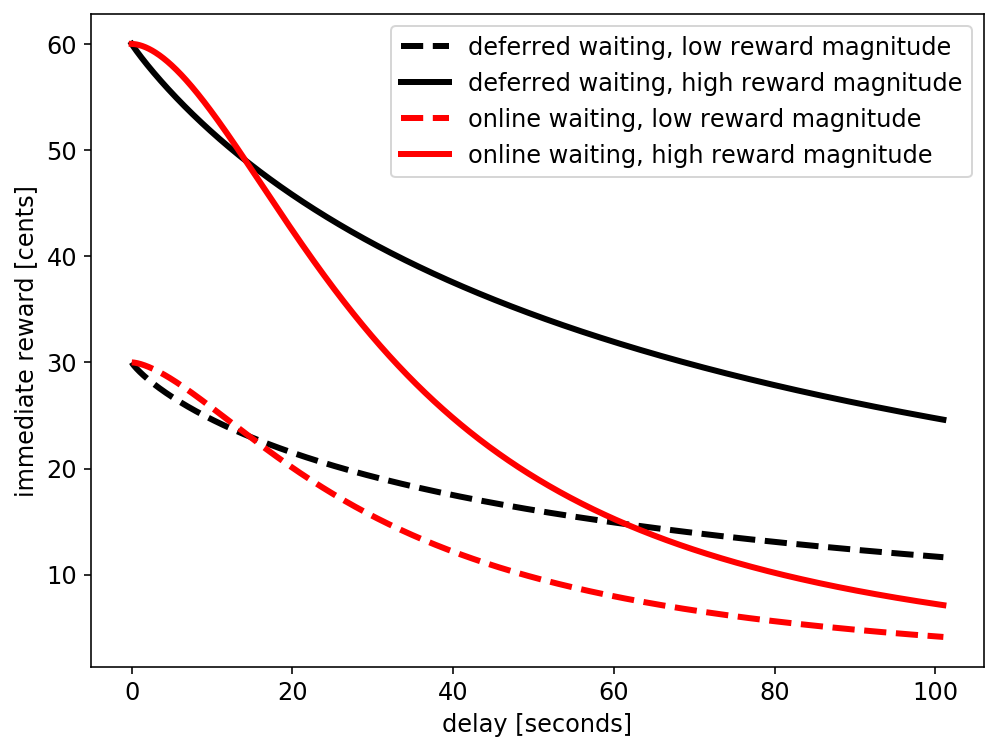

In [20]:
# Experiment 1
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

paradigms = ['deferred', 'online']
reward_mags = ['low', 'high']

for paradigm in paradigms:
    for reward_mag in reward_mags:
        
        if paradigm is 'online':
            col = 'r'
        else:
            col = 'k'
            
        if reward_mag is 'low':
            RB = 30
            ls = '--'
        else:
            RB = 60
            ls = '-'
            
        label_text = f'{paradigm} waiting, {reward_mag} reward magnitude'
        
        logk = expt1.loc[(expt1['paradigm'] == paradigm) 
                         & (expt1['reward_mag'] == reward_mag)]['logk'].values
        logk = np.mean(logk)
        
        logs = expt1.loc[(expt1['paradigm'] == paradigm) 
                         & (expt1['reward_mag'] == reward_mag)]['logs'].values
        logs = np.mean(logs)
        
        print(np.exp(logk), np.exp(logs))
        

        
        ax.plot(delays, 
            RB*discount_function(delays, np.exp(logk), np.exp(logs)),
            c=col, linewidth=3, ls=ls, label=label_text)

ax.legend()

ax.set(xlabel='delay [seconds]', 
       ylabel='immediate reward [cents]');

plt.savefig(f'{out_dir}expt1_group_df_plot.pdf', bbox_inches='tight')

0.013287897258433599 0.8646601787567496
0.006711418082204295 0.9906037684445684
0.04591423764742209 1.8147383584857342
0.01875641916640875 2.183357030781248


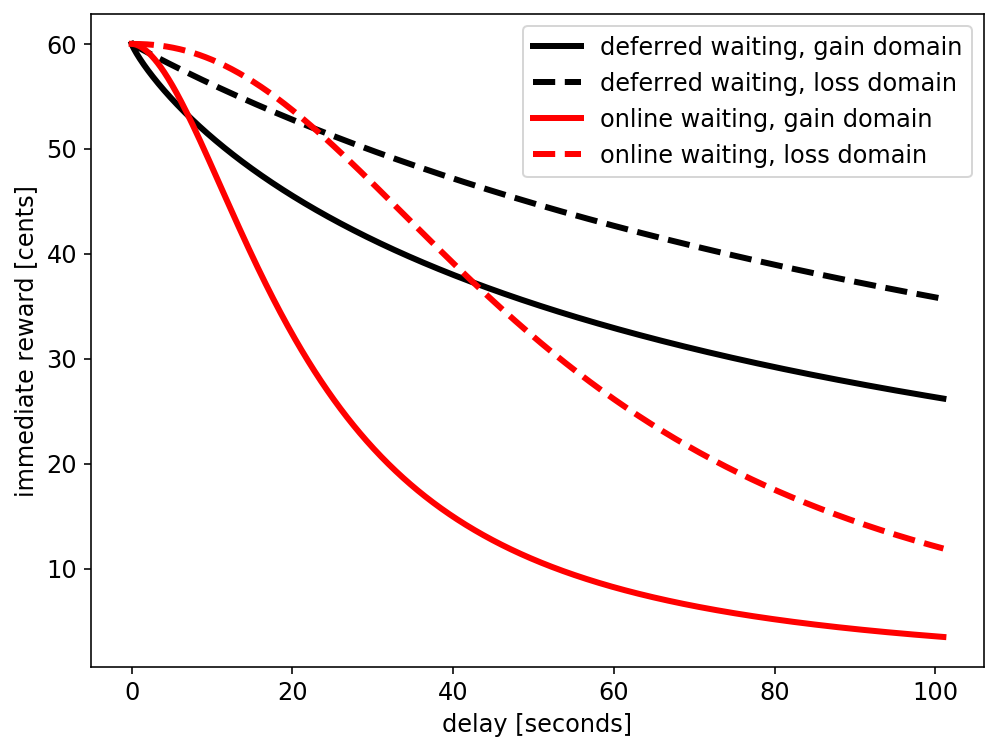

In [21]:
# Experiment 2
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

paradigms = ['deferred', 'online']
domains = ['gain', 'loss']

for paradigm in paradigms:
    for domain in domains:
        
        if paradigm is 'online':
            col = 'r'
        else:
            col = 'k'
            
        if domain is 'gain':
            RB = 60
            ls = '-'
        else:
            RB = 60
            ls = '--'
            
        label_text = f'{paradigm} waiting, {domain} domain'
        
        logk = expt2.loc[(expt2['paradigm'] == paradigm) 
                         & (expt2['domain'] == domain)]['logk'].values
        logk = np.mean(logk)
        
        logs = expt2.loc[(expt2['paradigm'] == paradigm) 
                         & (expt2['domain'] == domain)]['logs'].values
        logs = np.mean(logs)
        
        print(np.exp(logk), np.exp(logs))
        

        
        ax.plot(delays, 
            RB*discount_function(delays, np.exp(logk), np.exp(logs)),
            c=col, linewidth=3, ls=ls, label=label_text)

ax.legend()

ax.set(xlabel='delay [seconds]', 
       ylabel='immediate reward [cents]');

plt.savefig(f'{out_dir}expt2_group_df_plot.pdf', bbox_inches='tight')

## Plot parameter distributions by Experiment and condition

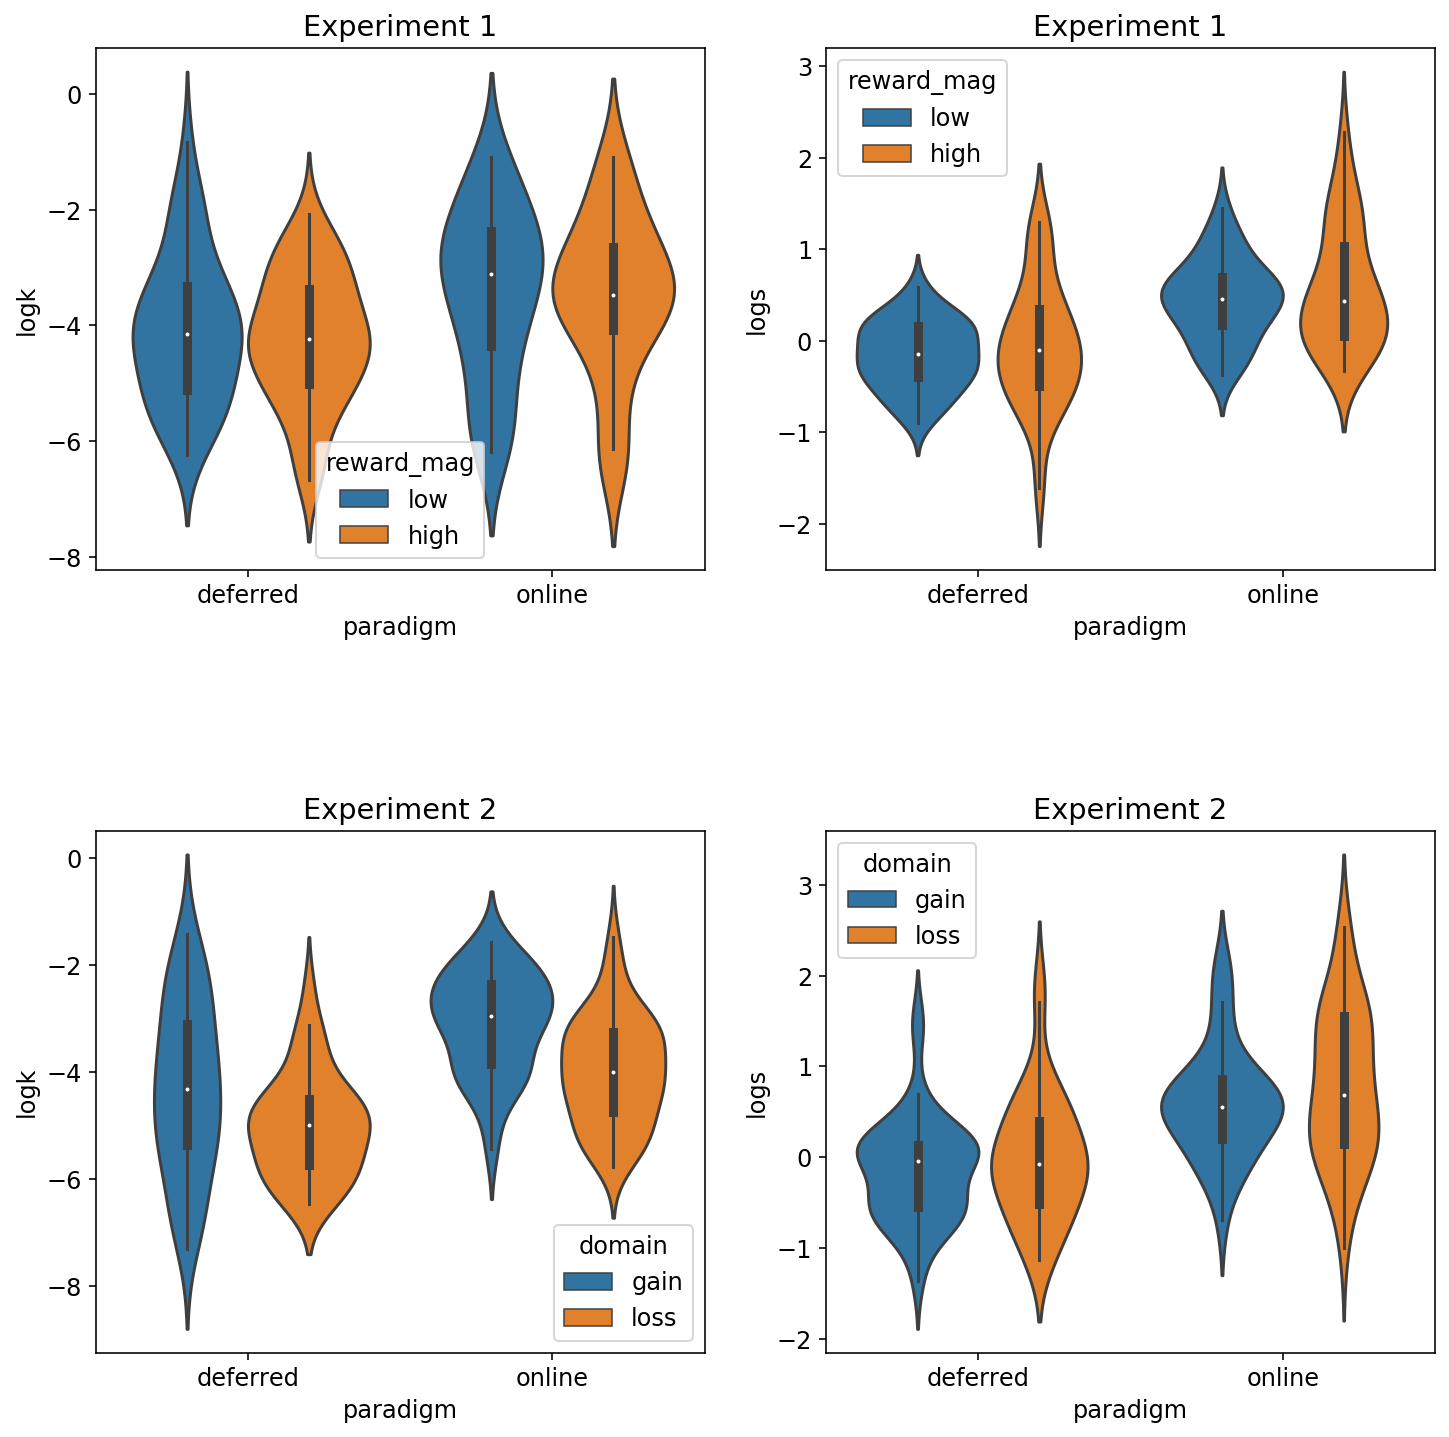

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Experiment 1
sns.violinplot(x="paradigm", hue="reward_mag", y="logk", data=expt1, ax=ax[0,0], size=6)
ax[0,0].set(title="Experiment 1")

sns.violinplot(x="paradigm", hue="reward_mag", y="logs", data=expt1, ax=ax[0,1], size=6)
ax[0,1].set(title="Experiment 1")

# Experiment 2
sns.violinplot(x="paradigm", hue="domain", y="logk", data=expt2, ax=ax[1,0], size=6)
ax[1,0].set(title="Experiment 2")

sns.violinplot(x="paradigm", hue="domain", y="logs", data=expt2, ax=ax[1,1], size=6)
ax[1,1].set(title="Experiment 2")

# increase spacing
plt.subplots_adjust(hspace=0.5)

plt.savefig('output/parameter visualisation by expt and condition.pdf', bbox_inches='tight')

We want to test the hypothesis that $\log(s)=0$ for all description paradigm data in Experiment 1. We also want to test $\log(s)=0$ for the description paradigm in Experiment 2. So we need to export this to analyse in JASP.

In [23]:
# expt 1
expt1_deferred_logs = (expt1.loc[expt1['paradigm'] == "deferred"]["logs"]
                            .to_frame()
                            .rename({'logs': 'Experiment 1 deferred'}, axis='columns')
                            .reset_index(drop=True))

expt1_online_logs = (expt1.loc[expt1['paradigm'] == "online"]["logs"]
                          .to_frame()
                          .rename({'logs': 'Experiment 1 online'}, axis='columns')
                          .reset_index(drop=True))

# expt 2
expt2_deferred_logs = (expt2.loc[expt2['paradigm'] == "deferred"]["logs"]
                            .to_frame()
                            .rename({'logs': 'Experiment 2 deferred'}, axis='columns')
                            .reset_index(drop=True))

expt2_online_logs = (expt2.loc[expt2['paradigm'] == "online"]["logs"]
                          .to_frame()
                          .rename({'logs': 'Experiment 2 online'}, axis='columns')
                          .reset_index(drop=True))

# Note that this will be a ragged array in that we have different numbers of 
# participants in the description and experience conditions in each experiment.
# So there will be some missing values at the bottom of some columns.
logs_data = pd.concat([expt1_deferred_logs, expt1_online_logs,
                       expt2_deferred_logs, expt2_online_logs], axis=1)

In [24]:
logs_data.to_csv('analysis/logs_values.csv')